# Ensemble TechniquesProject

## Data Description & Context: 
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician

## Domain:
Medicine

## Attribute Information:
1) name -ASCII subject name and recording  <br/>
2) vocal frequncy: <br/>
   &emsp; a) numberMDVP:Fo(Hz) -Average vocal fundamental frequency <br/> 
   &emsp; b) MDVP:Fhi(Hz) -Maximum vocal fundamental frequency <br/>
   &emsp; c) MDVP:Flo(Hz) -Minimum vocal fundamental frequency <br/>
3) Several measures of variation in fundamental frequency: <br/>
   &emsp; a) MDVP:Jitter(%) <br/>
   &emsp; b) MDVP:Jitter(Abs) <br/>
   &emsp; c) MDVP:RAP <br/>
   &emsp; d) MDVP:PPQ <br/>
   &emsp; e) Jitter:DDP <br/>
4) Several measures of variation in amplitudeNHR <br/>
   &emsp; a) MDVP:Shimmer <br/>
   &emsp; b) MDVP:Shimmer(dB) <br/>
   &emsp; c) Shimmer:APQ3  <br/>
   &emsp; d) Shimmer:APQ5  <br/>
   &emsp; e) MDVP:APQ  <br/>
   &emsp; f) Shimmer:DDA <br/>
5) Two measures of ratio of noise to tonal components in the voicestatus: <br/>
   &emsp; a) NHR <br/>
   &emsp; b) HNR <br/>
6) Health status of the subject: <br/>
   &emsp; a) status(1) -Parkinson's <br/>
   &emsp; b) status (0) -Healthy <br/>
7) Two nonlinear dynamical complexity measures: <br/>
   &emsp; a) RPDE <br/>
   &emsp; b) D2 <br/>
8) Signal fractal scaling exponents: <br/>
   &emsp; a) DFA <br/>
9) Three nonlinear measures of fundamental frequency: <br/>
     &emsp; a) spread1 <br/>
     &emsp; b) spread2 <br/>
     &emsp; a) PPE <br/> 

## Objective: 
Goal is to classify the patients into the respective labels using the attributes from their voice recordings


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn import metrics
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading source file
dp=pd.read_csv("./Data - Parkinsons.txt", sep=',')

In [3]:
#checking the first 5 rows of the data
dp.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
#checking for the dimension of the data
row, column = dp.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 195 rows and 24 columns


In [5]:
#checking the attributes type
print('The data type of each attribute: \n')
dp.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR      

In [6]:
#Distribution of target variable
positive = len(dp.loc[dp['status'] == 1])
negative = len(dp.loc[dp['status'] == 0])
print("Number of positive cases: {0} ({1:2.2f}%)".format(positive, (positive / (positive + negative)) * 100 ))
print("Number of negative cases: {0} ({1:2.2f}%)".format(negative, (negative / (positive + negative)) * 100))

Number of positive cases: 147 (75.38%)
Number of negative cases: 48 (24.62%)


In [7]:
#5-point summary
dp.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [8]:
#checking for missing values
print('The data set has no missing values \n')
dp.isnull().sum()

The data set has no missing values 



name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
#Dropping name
dp=dp.drop(["name"],axis=1)

## EDA

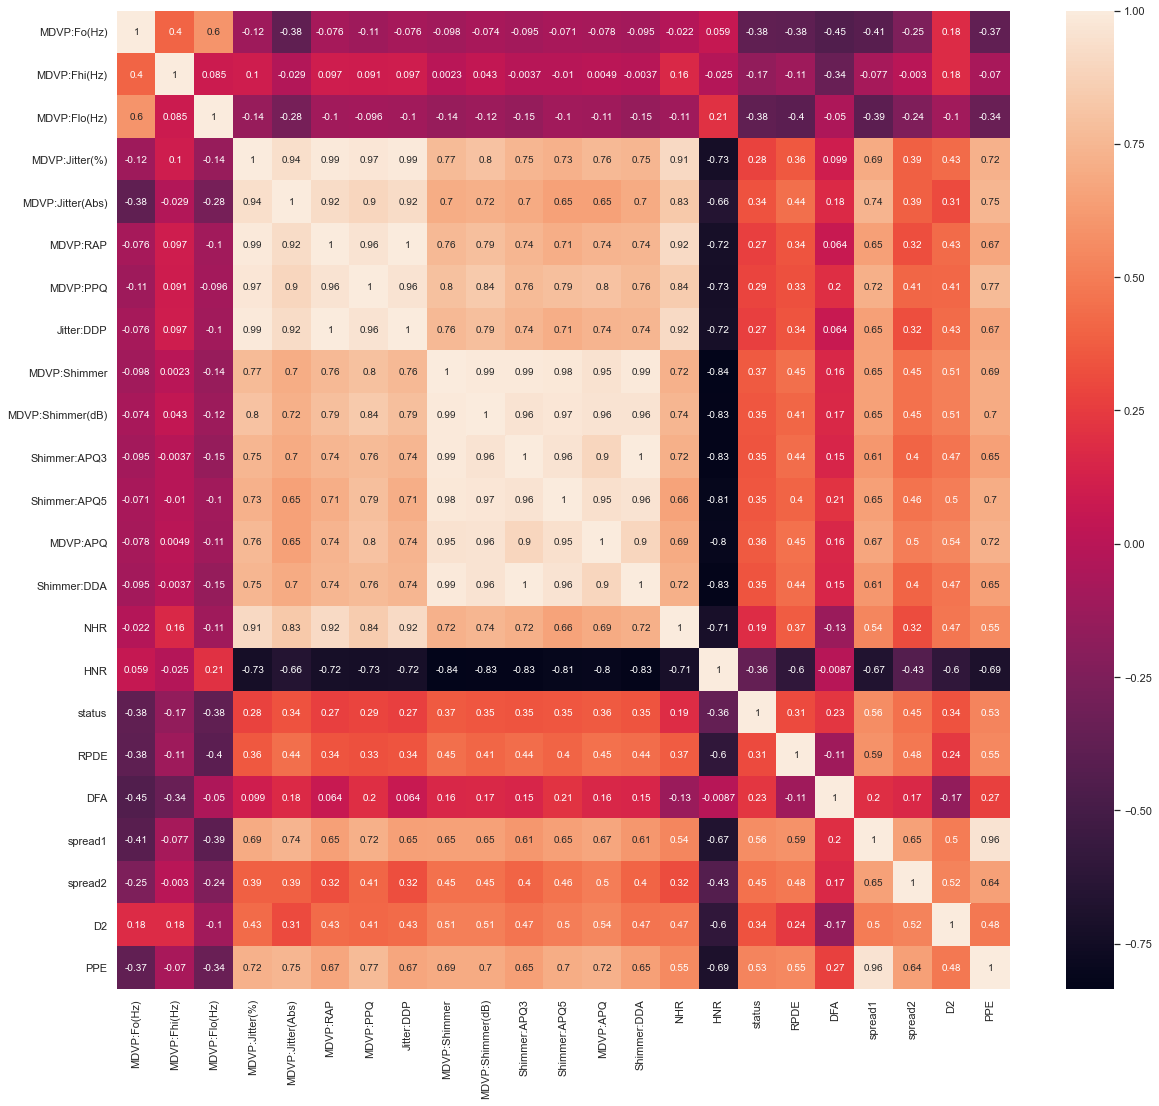

In [10]:
#checking for correlation
plt.figure(figsize=(20,18))
corr=dp.corr()
sns.heatmap(corr,annot=True);

Variables seem to to be highly correlated with each other.

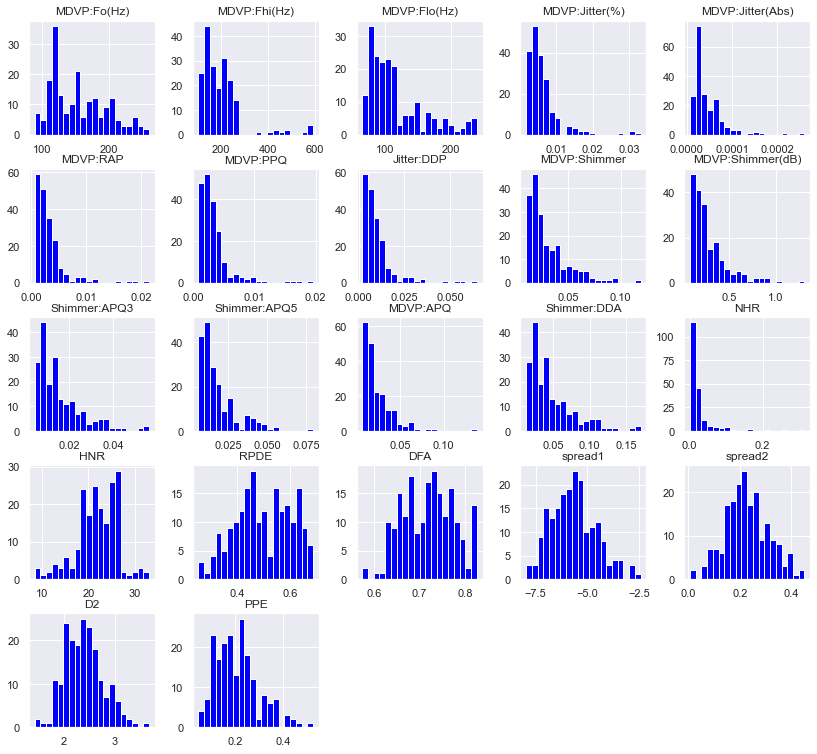

In [11]:
dp2=dp.drop(['status'],axis=1)
dp2.hist(bins = 20, figsize = (14, 13), color = 'blue')
plt.show()

measures of vocal frequency, measures of variation in fundamental frequency, measures of variation in amplitude, ratio of noise to tonal components in the voice(NHR), these distribution seem to be skewed to the right/positive side.

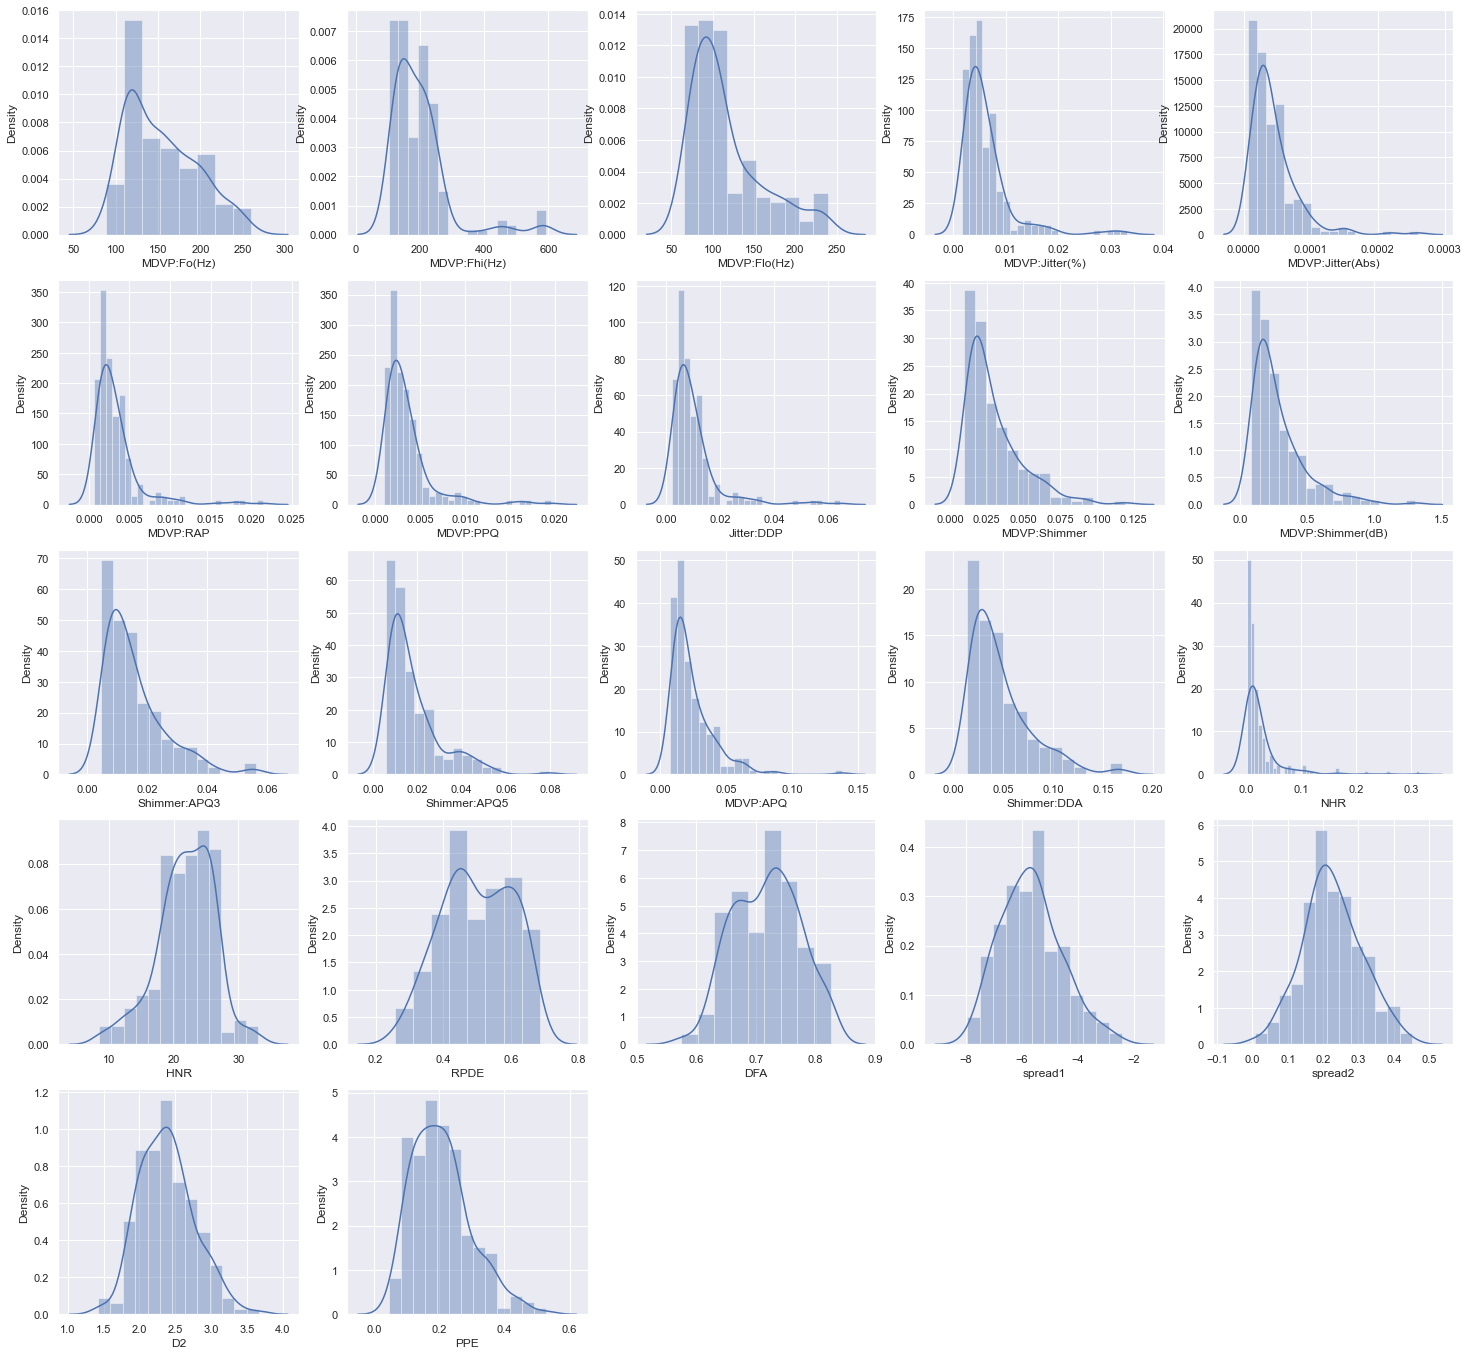

In [12]:
plt.figure(figsize=(25, 24))
col = 1
for i in dp2.columns:
    plt.subplot(5, 5, col)
    sns.distplot(dp2[i], color = 'b')
    col += 1 

 Ratio of noise to tonal components in the voice(HNR), nonlinear dynamical complexity measures, nonlinear measures of fundamental frequency, Signal fractal scaling exponent, these attributes have a normal distribution

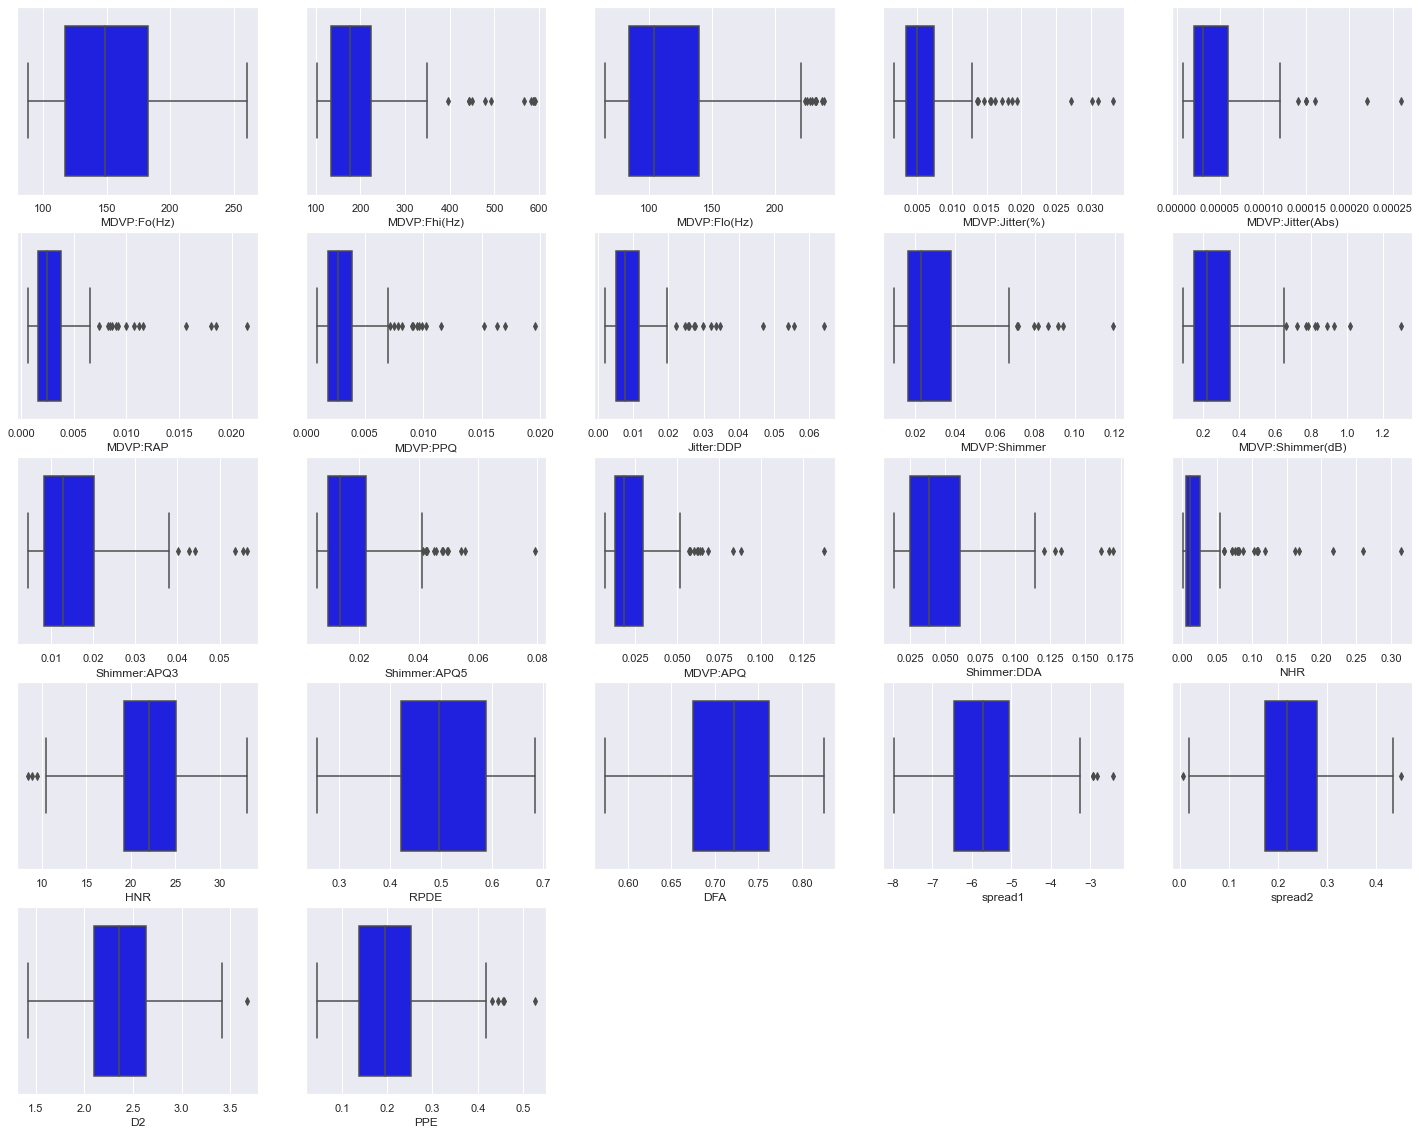

In [13]:
plt.figure(figsize=(25, 20))
col = 1
for i in dp2.columns:
    plt.subplot(5, 5, col)
    sns.boxplot(dp2[i],color='blue')
    col += 1

Except MDVP:Fo(Hz), RPDE and DFA all the other variables have outliers.

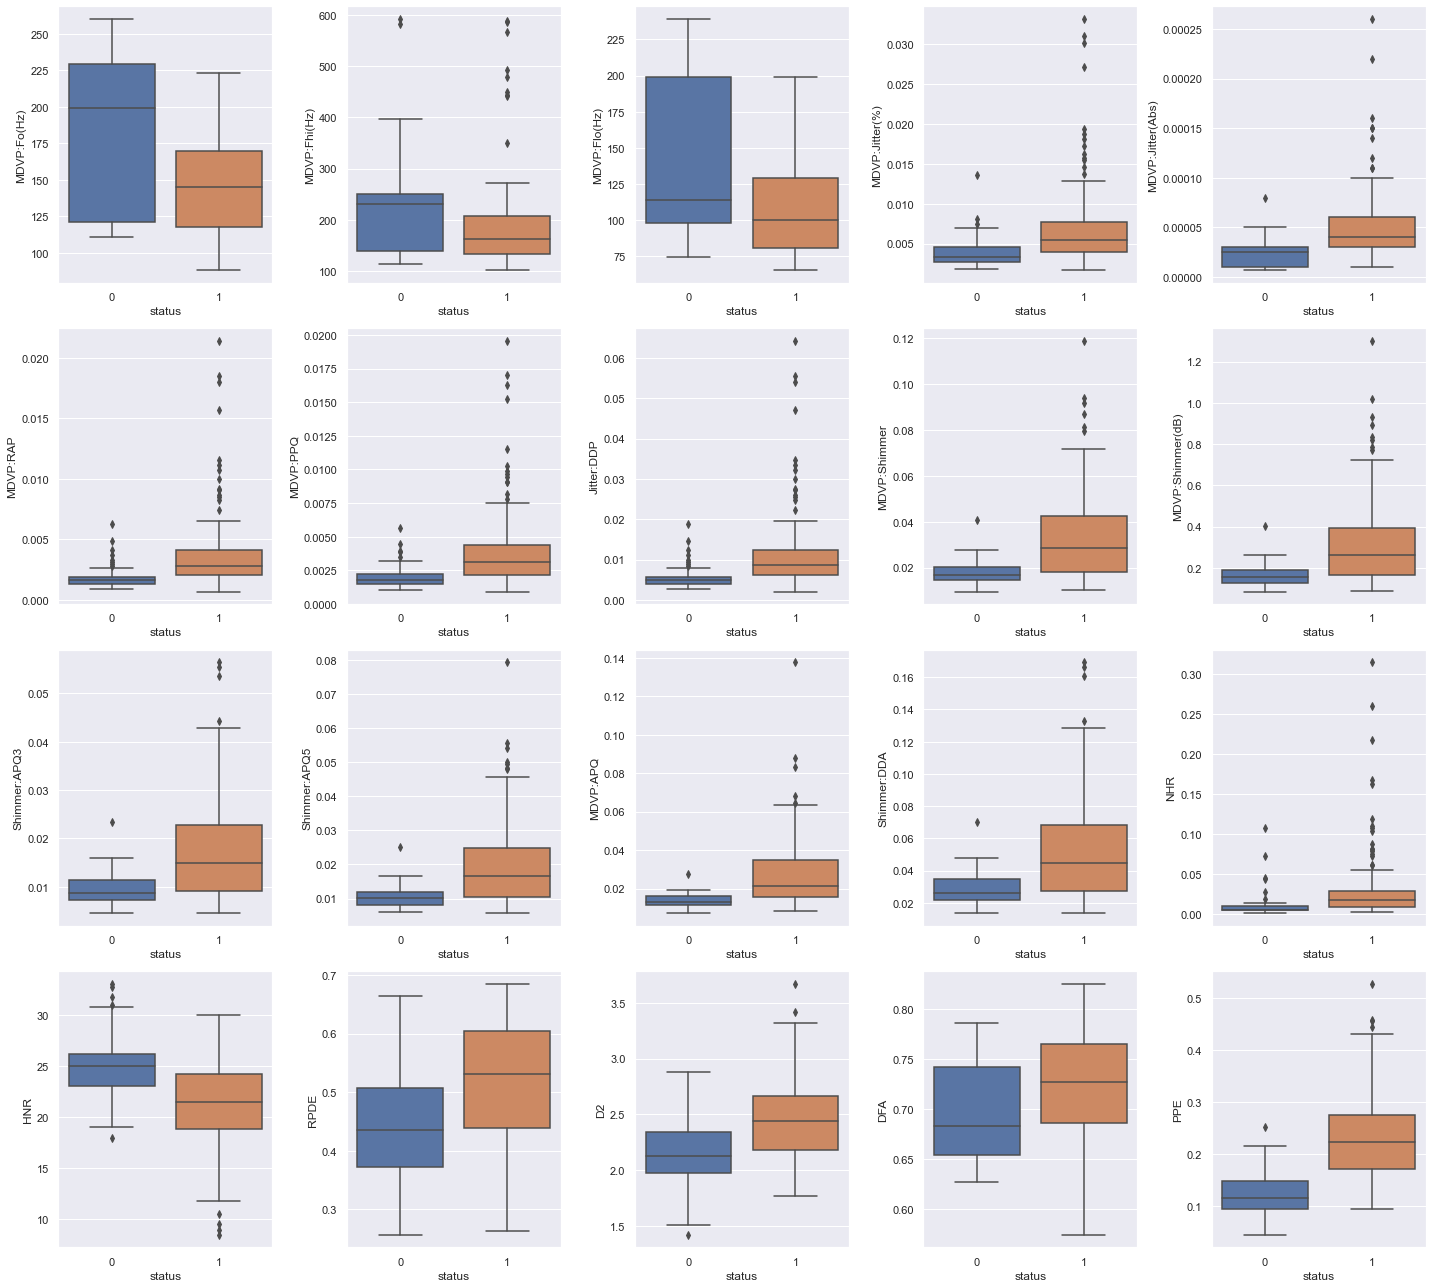

In [14]:
fig,axs = plt.subplots(4,5,figsize=(20,18))
sns.boxplot(x="status", y="MDVP:Fo(Hz)",data=dp,ax=axs[0,0]);
sns.boxplot(x="status", y="MDVP:Fhi(Hz)",data=dp,ax=axs[0,1]);
sns.boxplot(x="status", y="MDVP:Flo(Hz)",data=dp,ax=axs[0,2]);
sns.boxplot(x="status", y="MDVP:Jitter(%)",data=dp,ax=axs[0,3]);
sns.boxplot(x="status", y="MDVP:Jitter(Abs)",data=dp,ax=axs[0,4]);
sns.boxplot(x="status", y="MDVP:RAP",data=dp,ax=axs[1,0]);
sns.boxplot(x="status", y="MDVP:PPQ",data=dp,ax=axs[1,1]);
sns.boxplot(x="status", y="Jitter:DDP",data=dp,ax=axs[1,2]);
sns.boxplot(x="status", y="MDVP:Shimmer",data=dp,ax=axs[1,3]);
sns.boxplot(x="status", y="MDVP:Shimmer(dB)",data=dp,ax=axs[1,4]);
sns.boxplot(x="status", y="Shimmer:APQ3",data=dp,ax=axs[2,0]);
sns.boxplot(x="status", y="Shimmer:APQ5",data=dp,ax=axs[2,1]);
sns.boxplot(x="status", y="MDVP:APQ",data=dp,ax=axs[2,2]);
sns.boxplot(x="status", y="Shimmer:DDA",data=dp,ax=axs[2,3]);
sns.boxplot(x="status", y="NHR",data=dp,ax=axs[2,4]);
sns.boxplot(x="status", y="HNR",data=dp,ax=axs[3,0]);
sns.boxplot(x="status", y="RPDE",data=dp,ax=axs[3,1]);
sns.boxplot(x="status", y="D2",data=dp,ax=axs[3,2]);
sns.boxplot(x="status", y="DFA",data=dp,ax=axs[3,3]);
sns.boxplot(x="status", y="PPE",data=dp,ax=axs[3,4]);
fig.tight_layout()

When comparing the interqaurtile ranges for all the numric attributes against the status of the patient, it can be inferred that measures of vocal frequncy have a higher iqr for healty patients, and Average HNR is higher for healthy patients .

In [15]:
#changing status to an integer variable
dp['status']=dp['status'].astype('int')
dp['status'].dtype

dtype('int32')

In [16]:
# splitting data into training and test set for independent attributes

x_train, x_test, y_train, y_test =train_test_split(dp.drop('status',axis=1), dp['status'], test_size=.30,
                                                   random_state=22)

In [17]:
print("Training Positive cases    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Negative cases   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Positive cases        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Negative cases       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Training Positive cases    : 105 (77.21%)
Training Negative cases   : 31 (22.79%)

Test Positive cases        : 42 (71.19%)
Test Negative cases       : 17 (28.81%)



## Decision Tree

In [18]:
clf_pruned=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=5,random_state=100)
clf_pruned.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

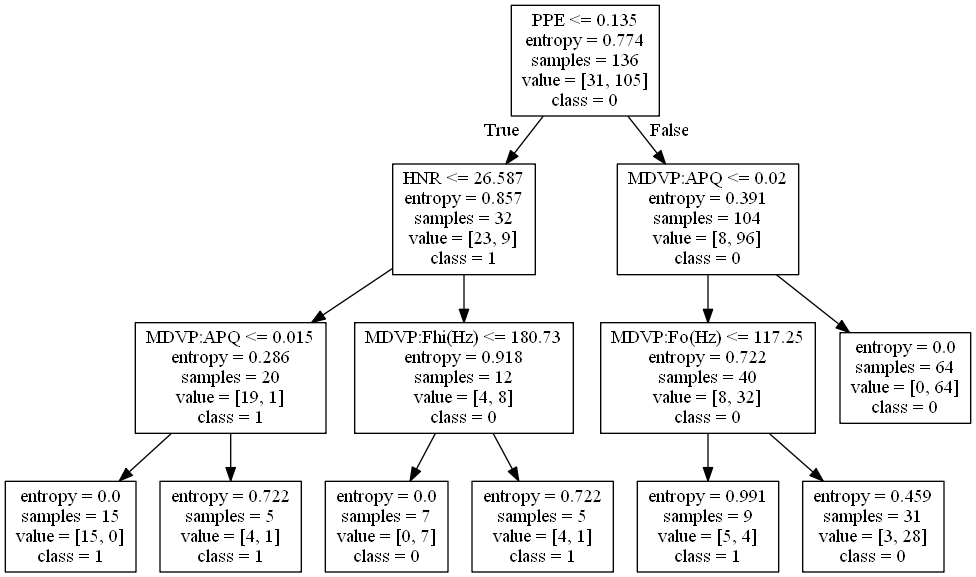

In [19]:
from sklearn import tree
from os import system
from IPython.display import Image
train_char_label = ['1','0']
dp_Tree_FileR = open('dp_treeR.dot','w')
dot_data = tree.export_graphviz(clf_pruned, out_file=dp_Tree_FileR, feature_names = list(x_train), class_names = list(train_char_label))
dp_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng dp_treeR.dot -o dp_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("dp_treeR.png"))

In [20]:
## Calculating feature importance
FI_DT = pd.DataFrame(clf_pruned.feature_importances_, columns = ['Feature Importance'], index = x_train.columns)
FI_dt = pd.DataFrame(FI_DT.sort_values(by = 'Feature Importance', ascending = False))
FI_dt.reset_index(inplace=True)
FI_dt = FI_dt.rename(columns={'index': 'Variable'}, index=None)
FI_dt

,Variable,Feature Importance
0,PPE,0.496272
1,MDVP:APQ,0.185837
2,HNR,0.142491
3,MDVP:Fhi(Hz),0.098850
4,MDVP:Fo(Hz),0.076549
5,MDVP:RAP,0.000000
6,NHR,0.000000
7,D2,0.000000
8,spread2,0.000000
9,spread1,0.000000


In [21]:
#predicting on train data
train_predict_dt = clf_pruned.predict(x_train)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_train, train_predict_dt)))
print()

Model Accuracy on train: 0.9338



In [22]:
#predicting on test data
test_predict_dt = clf_pruned.predict(x_test)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_test, test_predict_dt)))
print()

Model Accuracy on test: 0.8136



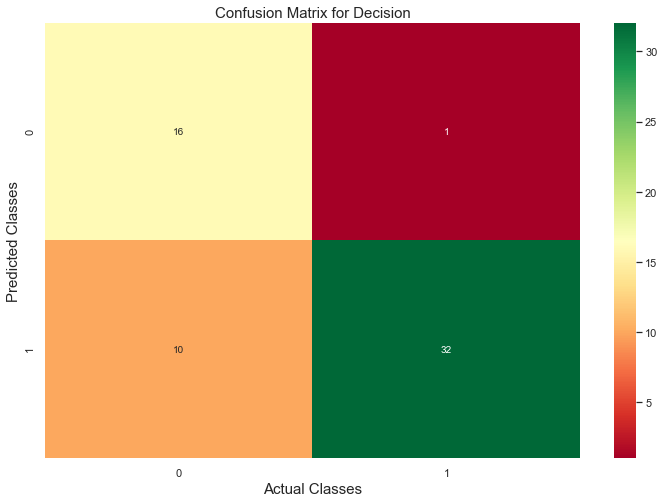

In [23]:
# visualizing confusion matrix
y_predict = clf_pruned.predict(x_test)
cm= confusion_matrix(y_test, y_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for Decision', fontsize = 15);

With help of CART we can come with decision's : <br/>
Rule 1: if PPE <= 0.135 and HNR <= 26.587 and MDVP:APQ <= 0.015 then the patient is likely to have parkinson's <br/>
Rule 2: if PPE <= 0.135 and HNR > 26.587 and MDVP:Fhi(Hz) <= 180.73 then the patient is likely to be healthy <br/>
Rule 3: if PPE > 0.135 and MDVP:APQ > 0.02 then the patient is likely to be healthy <br/>
Rule 4: if PPE > 0.135 and MDVP:APQ <= 0.02 and MDVP:Fo(Hz) <= 117.25 is likely to have parkinson's<br/>


## Logistic Regression

In [24]:
#Scaling the data
X=dp.drop(['status'],axis=1)
y=dp['status']
# convert all attributes to Z scale 
XScaled  = X.apply(zscore)  
XScaled.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,...,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,3.529940e-17,-2.237526e-16,1.309494e-16,-2.127927e-17,2.562053e-18,-1.380662e-16,9.351494e-17,1.015569e-16,2.818258e-16,-1.374969e-16,...,-8.824850e-17,-1.577086e-16,5.152574e-17,8.770762e-16,-1.913000e-16,5.687758e-16,1.184451e-15,-1.429056e-16,-6.117614e-16,-2.960595e-17
std,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,...,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00
min,-1.596162e+00,-1.040581e+00,-1.171366e+00,-9.389487e-01,-1.064103e+00,-8.872543e-01,-9.180440e-01,-8.873331e-01,-1.072340e+00,-1.014787e+00,...,-9.993055e-01,-1.097815e+00,-6.002051e-01,-3.045707e+00,-2.333888e+00,-2.605676e+00,-2.097268e+00,-2.647338e+00,-2.510472e+00,-1.802384e+00
25%,-8.879183e-01,-6.820590e-01,-7.379376e-01,-5.708520e-01,-6.898141e-01,-5.561906e-01,-5.764609e-01,-5.557071e-01,-7.020291e-01,-6.881025e-01,...,-6.508513e-01,-7.326182e-01,-4.693595e-01,-6.089102e-01,-7.449206e-01,-7.852617e-01,-7.041503e-01,-6.269844e-01,-7.404100e-01,-7.687420e-01
50%,-1.317379e-01,-2.331437e-01,-2.766579e-01,-2.647942e-01,-4.018994e-01,-2.724216e-01,-2.748504e-01,-2.736279e-01,-3.583019e-01,-3.151160e-01,...,-3.444009e-01,-2.841460e-01,-3.271036e-01,4.508553e-02,-2.490033e-02,7.527941e-02,-3.353960e-02,-9.166005e-02,-5.315145e-02,-1.390580e-01
75%,6.913210e-01,2.969710e-01,5.458200e-01,2.366858e-01,4.618447e-01,1.785683e-01,1.848331e-01,1.784870e-01,4.346898e-01,3.485429e-01,...,3.146448e-01,4.543110e-01,1.966835e-02,7.225273e-01,8.587132e-01,7.932500e-01,5.869042e-01,6.337615e-01,6.668912e-01,5.165137e-01
max,2.564598e+00,4.327631e+00,2.829908e+00,5.570985e+00,6.220139e+00,6.125892e+00,5.862742e+00,6.126923e+00,4.751617e+00,5.246243e+00,...,6.726438e+00,4.029746e+00,7.192738e+00,2.528321e+00,1.800007e+00,1.942048e+00,2.989093e+00,2.692370e+00,3.376831e+00,3.569059e+00


In [25]:
#combining the data
dp=pd.concat([XScaled,y],axis=1)

In [26]:
#splitting the data in train and test 70:30
X = dp.drop('status',axis=1)    
Y = dp['status']  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [27]:
print("Training Positive cases    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Negative cases   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Positive cases        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Negative cases       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Training Positive cases    : 104 (76.47%)
Training Negative cases   : 32 (23.53%)

Test Positive cases        : 43 (72.88%)
Test Negative cases       : 16 (27.12%)



In [28]:
model = LogisticRegression(random_state=15)
model.fit(x_train, y_train)

LogisticRegression(random_state=15)

In [29]:
#predicting on train data
train_predict_log = model.predict(x_train)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_train, train_predict_log)))
print()

Model Accuracy on train: 0.8603



In [30]:
#predicting on test data
test_predict_log = model.predict(x_test)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_test, test_predict_log)))
print()

Model Accuracy on test: 0.8983



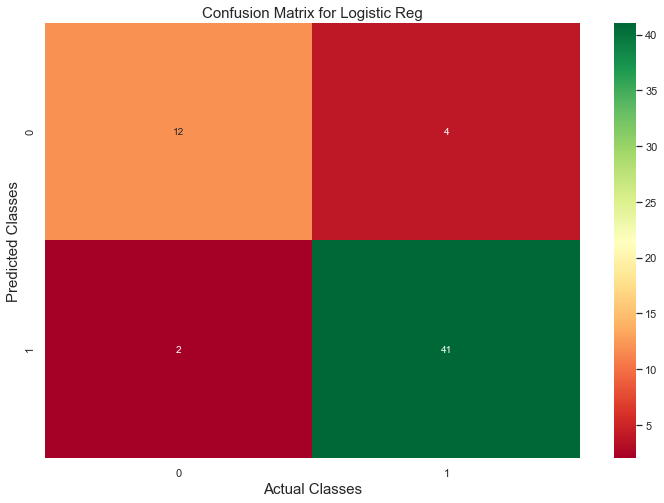

In [31]:
#visualization of confusion matrix in the form of a heatmap
y_predict_log = model.predict(x_test)
cm= confusion_matrix(y_test, y_predict_log)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for Logistic Reg', fontsize = 15);

In [32]:
#Printing the classification report
print("Classification Report")
print(metrics.classification_report(y_test, test_predict_log, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.91      0.95      0.93        43
           0       0.86      0.75      0.80        16

    accuracy                           0.90        59
   macro avg       0.88      0.85      0.87        59
weighted avg       0.90      0.90      0.90        59



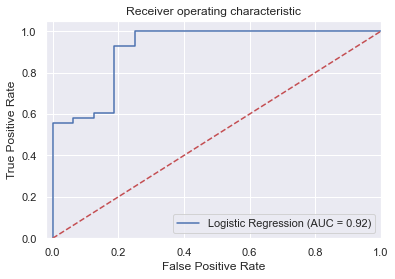

In [33]:
#Plotting ROC and AUC
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_log = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [34]:
precision_log, recall_log, f1_score_log, support = precision_recall_fscore_support(y_test, test_predict_log, average = 'macro')
print('Precision Score :', '%0.2f' % precision_log)
print('Recall Score :', '%0.2f' % recall_log)
print('F1-Score:', '%0.2f' % f1_score_log)
log_acc= accuracy_score(y_test, test_predict_log)
print('Accuracy Score :','%0.2f' % log_acc)
print('AUC :','%0.2f' % roc_auc_log)

Precision Score : 0.88
Recall Score : 0.85
F1-Score: 0.87
Accuracy Score : 0.90
AUC : 0.92


## KNN

In [35]:
# creating odd list of K for KNN
myList = list(range(1, 23))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [36]:
# empty list that will hold accuracy scores
accuracy_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    # predict the response
    y_predictKNN = knn.predict(x_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_predictKNN)
    accuracy_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in accuracy_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is: ', optimal_k)

The optimal number of neighbors is:  3


In [37]:
#Running KNN with 3 neighbours
knn = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )

In [38]:
# Call Nearest Neighbour algorithm
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [39]:
#predicting on the train data
train_predict_knn = knn.predict(x_train)
knn.score(x_train, y_train)

print('Model Accuracy on train: ', knn.score(x_train, y_train))

Model Accuracy on train:  1.0


In [40]:
#predicting on the test data
test_predict_knn = knn.predict(x_test)
knn.score(x_test, y_test)
print('Model Accuracy on test: ', knn.score(x_test, y_test))

Model Accuracy on test:  0.9661016949152542


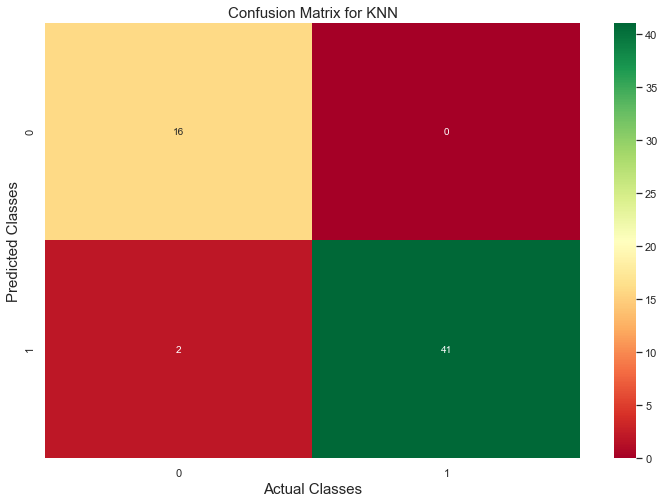

In [41]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_test, test_predict_knn)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for KNN', fontsize = 15);

In [42]:
#Printing the classification report
print("Classification Report")
print(metrics.classification_report(y_test, test_predict_knn, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.95      0.98        43
           0       0.89      1.00      0.94        16

    accuracy                           0.97        59
   macro avg       0.94      0.98      0.96        59
weighted avg       0.97      0.97      0.97        59



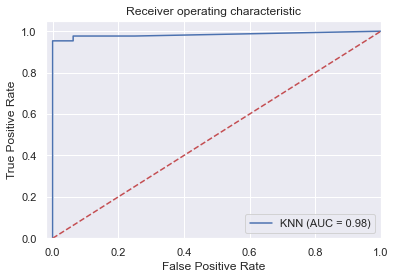

In [43]:
#plotting ROC and AUC
probs = knn.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_knn = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [44]:
precision_knn, recall_knn, f1_score_knn, support = precision_recall_fscore_support(y_test, test_predict_knn, average = 'macro')
print('Precision Score :', '%0.2f' % precision_knn)
print('Recall Score :', '%0.2f' % recall_knn)
print('F1-Score:', '%0.2f' % f1_score_knn)
knn_acc= accuracy_score(y_test, test_predict_knn)
print('Accuracy Score :','%0.2f' % knn_acc)
print('AUC :','%0.2f' % roc_auc_knn)

Precision Score : 0.94
Recall Score : 0.98
F1-Score: 0.96
Accuracy Score : 0.97
AUC : 0.98


## SVM

In [45]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= 4, kernel='rbf', gamma='scale' ,probability=True)
svc_model.fit(x_train, y_train)

SVC(C=4, probability=True)

In [46]:
#predicting on train data
sv_train_predict = svc_model .predict(x_train)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_train, sv_train_predict)))
print()

Model Accuracy on train: 0.9338



In [47]:
#predicting on test data
sv_test_predict = svc_model .predict(x_test)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_test, sv_test_predict)))
print()

Model Accuracy on test: 0.9322



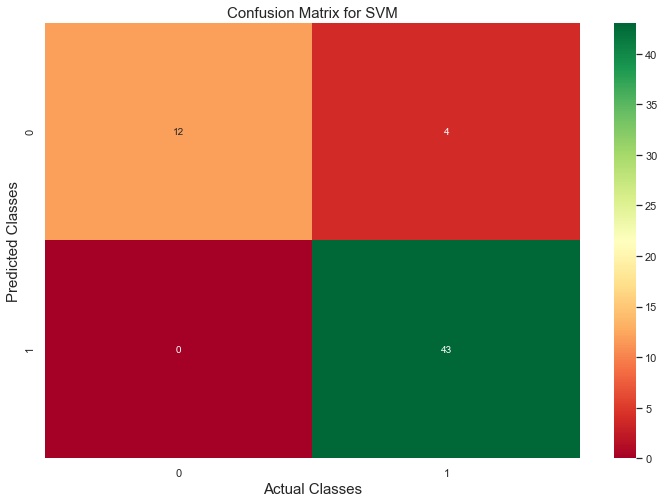

In [48]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_test, sv_test_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [49]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, sv_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.91      1.00      0.96        43
           0       1.00      0.75      0.86        16

    accuracy                           0.93        59
   macro avg       0.96      0.88      0.91        59
weighted avg       0.94      0.93      0.93        59



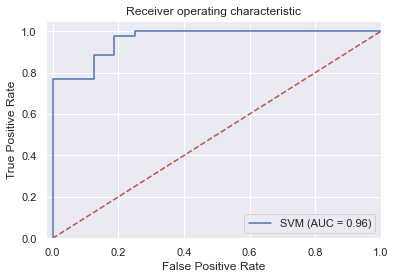

In [50]:
#plotting ROC and AUC
probs = svc_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_svc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='SVM (AUC = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

In [51]:
precision_SV, recall_SV, f1_score_SV, support = precision_recall_fscore_support(y_test, sv_test_predict,average='macro')
print('Precision Score :', '%0.2f' % precision_SV)
print('Recall Score :', '%0.2f' % recall_SV)
print('F1-Score:', '%0.2f' % f1_score_SV)
SV_Acc= accuracy_score(y_test, sv_test_predict)
print('Accuracy Score :','%0.2f' % SV_Acc)
print('AUC :','%0.2f' % roc_auc_svc)

Precision Score : 0.96
Recall Score : 0.88
F1-Score: 0.91
Accuracy Score : 0.93
AUC : 0.96


## Random forest

In [52]:
# splitting data into training and test set for independent attributes

X_train, X_test, Y_train, Y_test =train_test_split(dp.drop('status',axis=1), dp['status'], test_size=.30,
                                                   random_state=22)

In [53]:
print("Training Positive cases    : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train)) * 100))
print("Training Negative cases   : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train)) * 100))
print("")
print("Test Positive cases        : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test)) * 100))
print("Test Negative cases       : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test)) * 100))
print("")

Training Positive cases    : 105 (77.21%)
Training Negative cases   : 31 (22.79%)

Test Positive cases        : 42 (71.19%)
Test Negative cases       : 17 (28.81%)



In [54]:
rfcl = RandomForestClassifier(n_estimators=100, random_state=1,criterion = 'entropy')
rfcl = rfcl.fit(X_train, Y_train)

In [55]:
y_predictRF = rfcl.predict(X_test)
modelRF_score = rfcl.score(X_train, Y_train)
print('Accuracy Score of Training Data: ', modelRF_score)

Accuracy Score of Training Data:  1.0


In [56]:
modelRF_score = accuracy_score(Y_test, y_predictRF)
print('Accuracy Score of Test Data:', modelRF_score)

Accuracy Score of Test Data: 0.8813559322033898


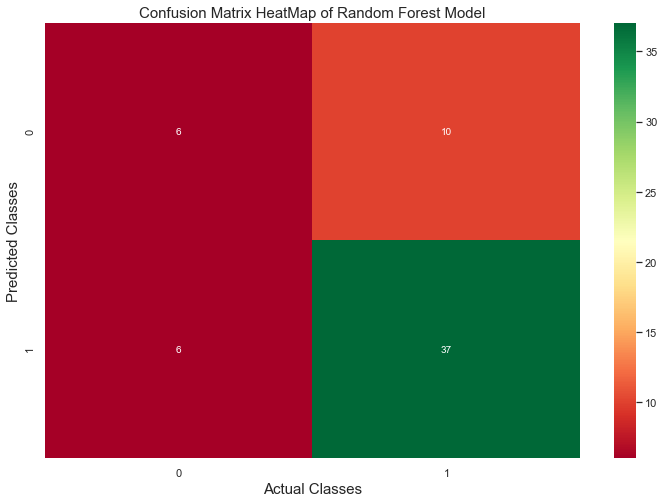

In [57]:
#visualization of confusion matrix in the form of a heatmap
cm = confusion_matrix(y_test, y_predictRF)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Random Forest Model', fontsize = 15);

In [58]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictRF, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.87      0.98      0.92        42
           0       0.92      0.65      0.76        17

    accuracy                           0.88        59
   macro avg       0.89      0.81      0.84        59
weighted avg       0.89      0.88      0.87        59



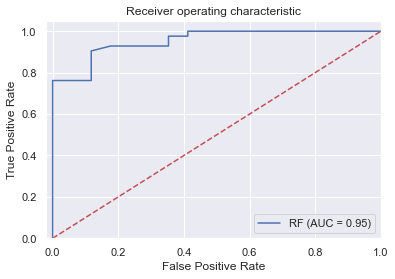

In [59]:
#plotting ROC and AUC
probs = rfcl.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_rf = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [60]:
precision_rf, recall_rf, f1_score_rf, support = precision_recall_fscore_support(Y_test,  y_predictRF,average='macro')
print('Precision Score :', '%0.2f' % precision_rf)
print('Recall Score :', '%0.2f' % recall_rf)
print('F1-Score:', '%0.2f' % f1_score_rf)
rf_Acc= accuracy_score(Y_test,  y_predictRF)
print('Accuracy Score :','%0.2f' % rf_Acc)
print('AUC :','%0.2f' % roc_auc_rf)

Precision Score : 0.89
Recall Score : 0.81
F1-Score: 0.84
Accuracy Score : 0.88
AUC : 0.95


In [61]:
## Calculating feature importance
FI_RF = pd.DataFrame(rfcl.feature_importances_, columns = ['Feature Importance'], index = X_train.columns)
FI_rf = pd.DataFrame(FI_RF.sort_values(by = 'Feature Importance', ascending = False))
FI_rf.reset_index(inplace=True)
FI_rf = FI_rf.rename(columns={'index': 'Variable'}, index=None)

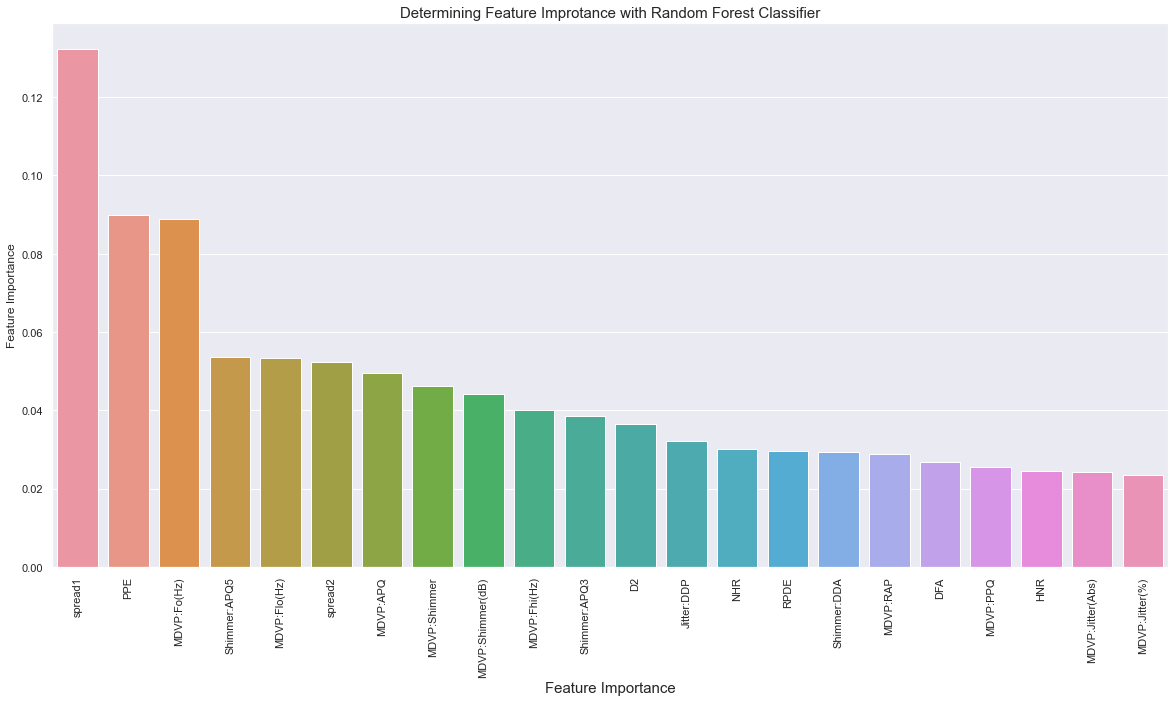

In [62]:
#variable importance
plt.figure(figsize = (20,10))
ax=sns.barplot(x=FI_rf['Variable'], y = FI_rf['Feature Importance'])
plt.xlabel('Feature Importance', fontsize = 15)
plt.title('Determining Feature Improtance with Random Forest Classifier', fontsize = 15);
x=plt.setp(ax.get_xticklabels(), rotation=90)

## Bagging

In [63]:
bgcl=BaggingClassifier(n_estimators = 100,random_state=15)
bgcl=bgcl.fit(x_train, y_train)

In [64]:
y_predictbg = bgcl.predict(x_test)
modelbg_score = bgcl.score(x_train, y_train)
print('Accuracy Score of Training Data: ', modelbg_score)

Accuracy Score of Training Data:  1.0


In [65]:
modelbg_score = accuracy_score(y_test, y_predictbg)
print('Accuracy Score of Test Data:', modelbg_score)

Accuracy Score of Test Data: 0.9322033898305084


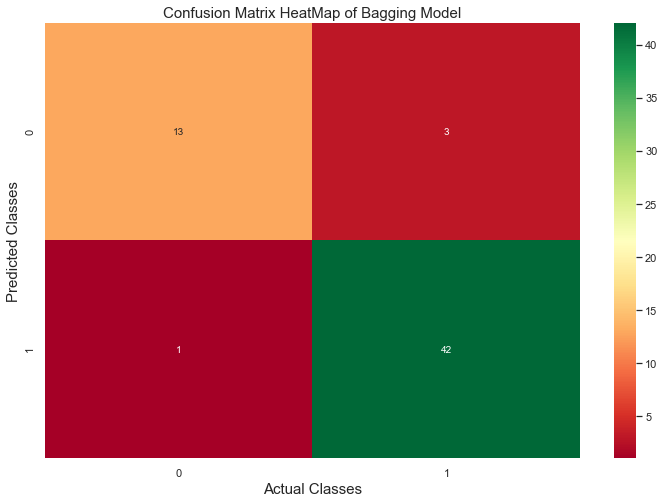

In [66]:
#visualization of confusion matrix in the form of a heatmap
cm = confusion_matrix(y_test, y_predictbg)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Bagging Model', fontsize = 15);

In [67]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_predictbg, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.93      0.98      0.95        43
           0       0.93      0.81      0.87        16

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



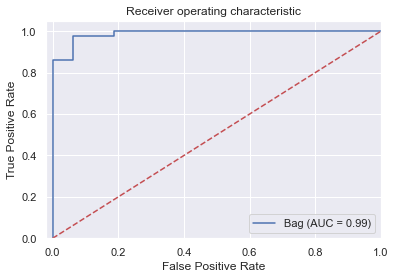

In [68]:
#plotting ROC and AUC
probs = bgcl.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_bg = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='Bag (AUC = %0.2f)' % roc_auc_bg)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('bg_ROC')
plt.show()

In [69]:
precision_bg, recall_bg, f1_score_bg, support = precision_recall_fscore_support(y_test,  y_predictbg,average='macro')
print('Precision Score :', '%0.2f' % precision_bg)
print('Recall Score :', '%0.2f' % recall_bg)
print('F1-Score:', '%0.2f' % f1_score_rf)
bg_Acc= accuracy_score(y_test,  y_predictbg)
print('Accuracy Score :','%0.2f' % bg_Acc)
print('AUC :','%0.2f' % roc_auc_bg)

Precision Score : 0.93
Recall Score : 0.89
F1-Score: 0.84
Accuracy Score : 0.93
AUC : 0.99


## Adaptive Boosting

In [70]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=clf_pruned,n_estimators=50, random_state=14,learning_rate=0.1)
abcl = abcl.fit(x_train, y_train)

In [71]:
y_predictad= abcl.predict(x_test)
modelad_score = abcl.score(x_train, y_train)
print('Accuracy Score of Training Data: ', modelad_score)

Accuracy Score of Training Data:  1.0


In [72]:
modelad_score = accuracy_score(y_test, y_predictad)
print('Accuracy Score of Test Data:', modelad_score)

Accuracy Score of Test Data: 0.9491525423728814


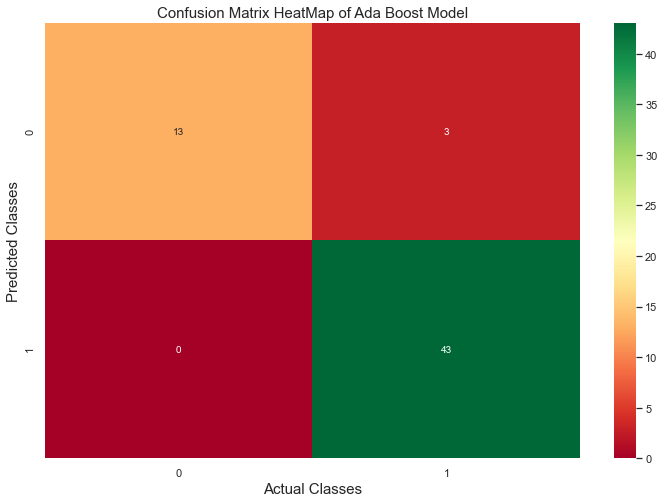

In [73]:
#visualization of confusion matrix in the form of a heatmap
cm = confusion_matrix(y_test, y_predictad)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Ada Boost Model', fontsize = 15);

In [74]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_predictad, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        43
           0       1.00      0.81      0.90        16

    accuracy                           0.95        59
   macro avg       0.97      0.91      0.93        59
weighted avg       0.95      0.95      0.95        59



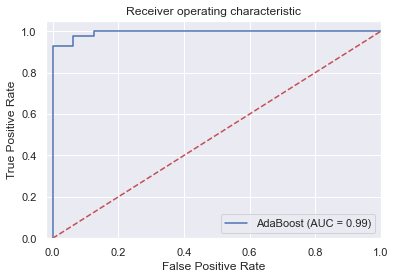

In [75]:
#plotting ROC and AUC
probs = abcl.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_ad = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='AdaBoost (AUC = %0.2f)' % roc_auc_ad)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ad_ROC')
plt.show()

In [76]:
precision_ad, recall_ad, f1_score_ad, support = precision_recall_fscore_support(y_test,  y_predictad,average='macro')
print('Precision Score :', '%0.2f' % precision_ad)
print('Recall Score :', '%0.2f' % recall_ad)
print('F1-Score:', '%0.2f' % f1_score_ad)
ad_Acc= accuracy_score(y_test,  y_predictad)
print('Accuracy Score :','%0.2f' % ad_Acc)
print('AUC :','%0.2f' % roc_auc_ad)

Precision Score : 0.97
Recall Score : 0.91
F1-Score: 0.93
Accuracy Score : 0.95
AUC : 0.99


In [77]:
## Calculating feature importance
FI_AD= pd.DataFrame(abcl.feature_importances_, columns = ['Feature Importance'], index = x_train.columns)
FI_ad = pd.DataFrame(FI_AD.sort_values(by = 'Feature Importance', ascending = False))
FI_ad.reset_index(inplace=True)
FI_ad = FI_ad.rename(columns={'index': 'Variable'}, index=None)
FI_ad

,Variable,Feature Importance
0,RPDE,1.598054e-01
1,MDVP:Flo(Hz),1.203747e-01
2,HNR,1.009296e-01
3,spread2,9.387229e-02
4,MDVP:Fhi(Hz),8.301673e-02
5,MDVP:Fo(Hz),7.997936e-02
6,MDVP:Shimmer(dB),7.422202e-02
7,MDVP:APQ,5.762676e-02
8,spread1,3.936225e-02
9,DFA,3.649360e-02


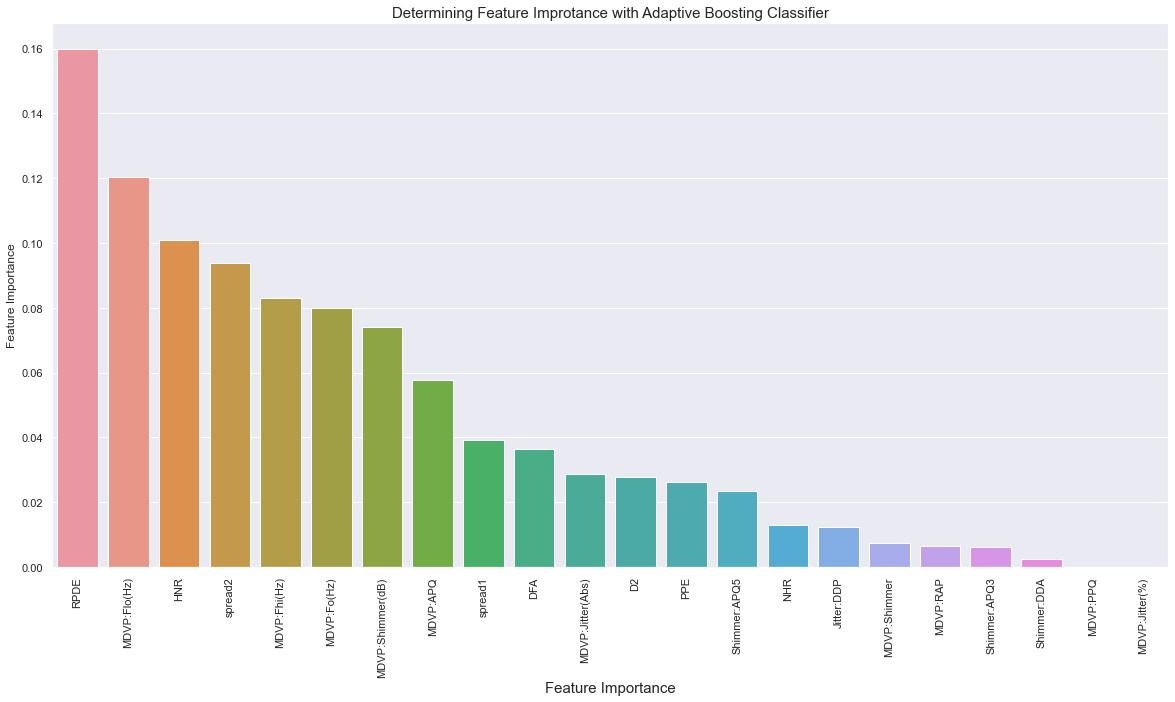

In [78]:
#variable importance
plt.figure(figsize = (20,10))
ax=sns.barplot(x=FI_ad['Variable'], y = FI_ad['Feature Importance'])
plt.xlabel('Feature Importance', fontsize = 15)
plt.title('Determining Feature Improtance with Adaptive Boosting Classifier', fontsize = 15);
ax=plt.setp(ax.get_xticklabels(), rotation=90)

## Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100,random_state=45,learning_rate=0.03)
gbcl = gbcl.fit(x_train, y_train)

In [80]:
y_predictgb= gbcl.predict(x_test)
modelgb_score = gbcl.score(x_train, y_train)
print('Accuracy Score of Training Data: ', modelgb_score)

Accuracy Score of Training Data:  1.0


In [81]:
modelgb_score = accuracy_score(y_test, y_predictgb)
print('Accuracy Score of Test Data:', modelgb_score)

Accuracy Score of Test Data: 0.9491525423728814


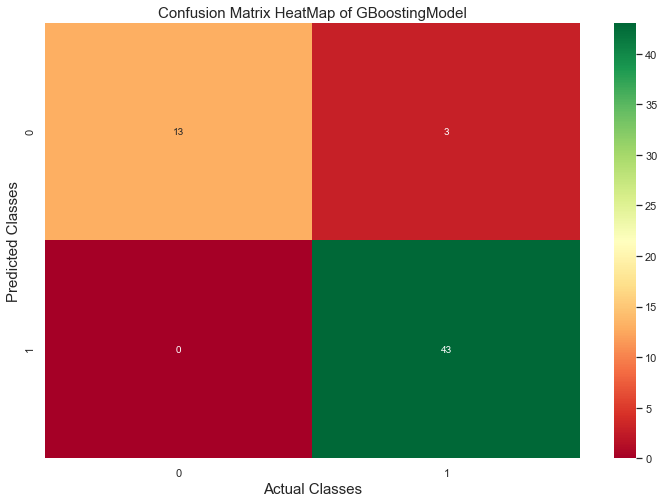

In [82]:
#visualization of confusion matrix in the form of a heatmap
cm = confusion_matrix(y_test, y_predictgb)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of GBoostingModel', fontsize = 15);

In [83]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_predictgb, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        43
           0       1.00      0.81      0.90        16

    accuracy                           0.95        59
   macro avg       0.97      0.91      0.93        59
weighted avg       0.95      0.95      0.95        59



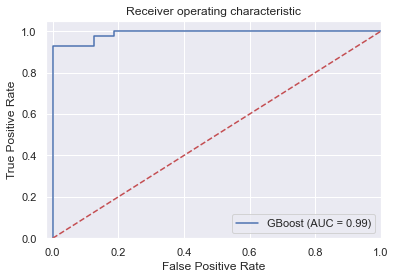

In [84]:
#plotting ROC and AUC
probs = gbcl.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_gb = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='GBoost (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('xg_ROC')
plt.show()

In [85]:
precision_gb, recall_gb, f1_score_gb, support = precision_recall_fscore_support(y_test,  y_predictgb,average='macro')
print('Precision Score :', '%0.2f' % precision_gb)
print('Recall Score :', '%0.2f' % recall_gb)
print('F1-Score:', '%0.2f' % f1_score_gb)
gb_Acc= accuracy_score(y_test,  y_predictgb)
print('Accuracy Score :','%0.2f' % gb_Acc)
print('AUC :','%0.2f' % roc_auc_gb)

Precision Score : 0.97
Recall Score : 0.91
F1-Score: 0.93
Accuracy Score : 0.95
AUC : 0.99


In [86]:
## Calculating feature importance
FI_GB= pd.DataFrame(gbcl.feature_importances_, columns = ['Feature Importance'], index = X_train.columns)
FI_gb = pd.DataFrame(FI_GB.sort_values(by = 'Feature Importance', ascending = False))
FI_gb.reset_index(inplace=True)
FI_gb = FI_gb.rename(columns={'index': 'Variable'}, index=None)
FI_gb

,Variable,Feature Importance
0,PPE,0.280559
1,MDVP:Fo(Hz),0.252900
2,HNR,0.101385
3,spread2,0.069057
4,MDVP:Shimmer(dB),0.066315
5,D2,0.052166
6,MDVP:Fhi(Hz),0.035768
7,NHR,0.034492
8,spread1,0.026269
9,DFA,0.019469


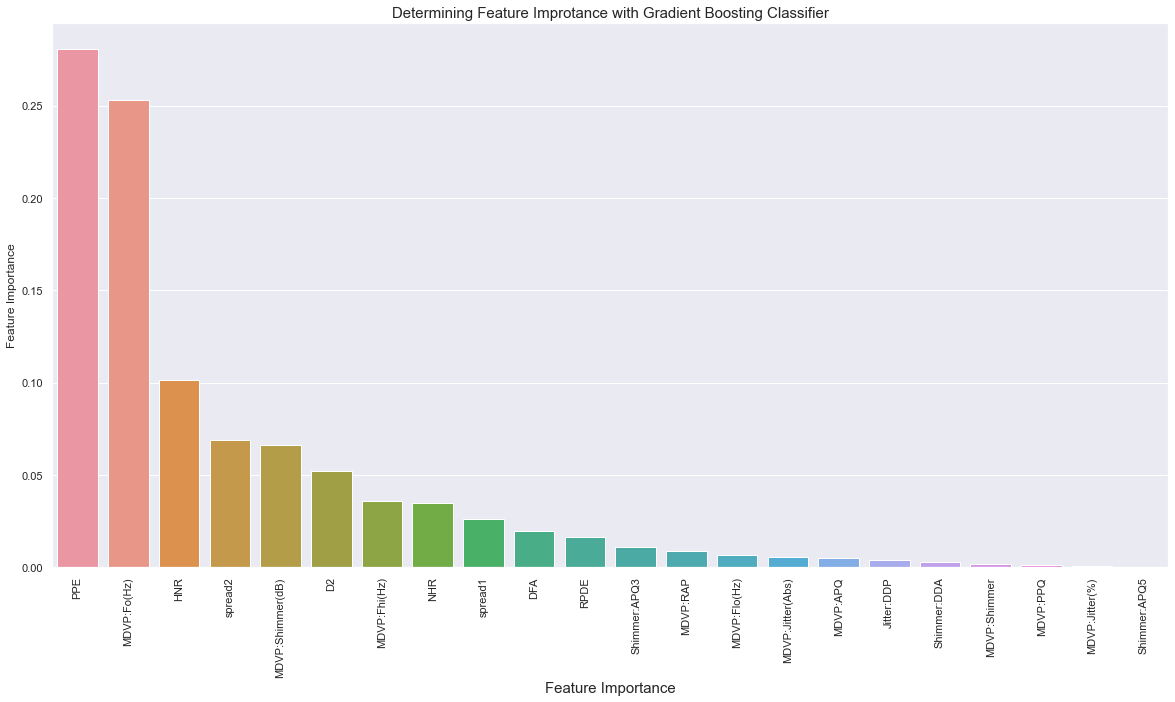

In [87]:
#variable importance
plt.figure(figsize = (20,10))
ax=sns.barplot(x=FI_gb['Variable'], y = FI_gb['Feature Importance'])
plt.xlabel('Feature Importance', fontsize = 15)
plt.title('Determining Feature Improtance with Gradient Boosting Classifier', fontsize = 15);
ax=plt.setp(ax.get_xticklabels(), rotation=90)

## XgBoost

In [88]:
XGB = XGBClassifier(objective='binary:logistic',eval_metric='auc',learning_rate=0.03)
XGB = XGB.fit(x_train, y_train)
y_predictxg = XGB.predict(x_test)

In [89]:
modelxg_score = XGB.score(x_train, y_train)
print('Accuracy Score of Training Data: ', modelxg_score)

Accuracy Score of Training Data:  1.0


In [90]:
modelxg_score = accuracy_score(y_test, y_predictxg)
print('Accuracy Score of Test Data:', modelxg_score)

Accuracy Score of Test Data: 0.9491525423728814


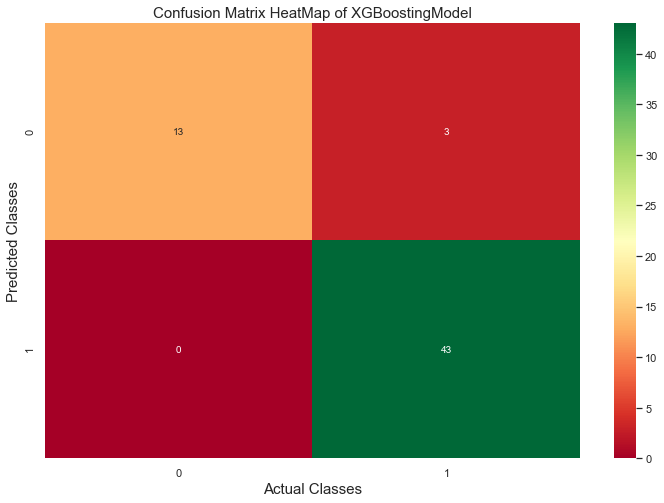

In [91]:
#visualization of confusion matrix in the form of a heatmap
cm = confusion_matrix(y_test, y_predictxg)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of XGBoostingModel', fontsize = 15);

In [92]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_predictxg, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        43
           0       1.00      0.81      0.90        16

    accuracy                           0.95        59
   macro avg       0.97      0.91      0.93        59
weighted avg       0.95      0.95      0.95        59



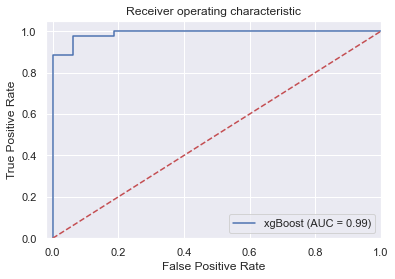

In [93]:
#plotting ROC and AUC
probs = XGB.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_xg = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='xgBoost (AUC = %0.2f)' % roc_auc_xg)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('xg_ROC')
plt.show()

In [94]:
precision_xg, recall_xg, f1_score_xg, support = precision_recall_fscore_support(y_test,  y_predictxg,average='macro')
print('Precision Score :', '%0.2f' % precision_xg)
print('Recall Score :', '%0.2f' % recall_xg)
print('F1-Score:', '%0.2f' % f1_score_xg)
xg_Acc= accuracy_score(y_test,  y_predictxg)
print('Accuracy Score :','%0.2f' % xg_Acc)
print('AUC :','%0.2f' % roc_auc_xg)

Precision Score : 0.97
Recall Score : 0.91
F1-Score: 0.93
Accuracy Score : 0.95
AUC : 0.99


In [95]:
## Calculating feature importance
FI_XG= pd.DataFrame(XGB.feature_importances_, columns = ['Feature Importance'], index = x_train.columns)
FI_xg = pd.DataFrame(FI_XG.sort_values(by = 'Feature Importance', ascending = False))
FI_xg.reset_index(inplace=True)
FI_xg = FI_xg.rename(columns={'index': 'Variable'}, index=None)
FI_xg

,Variable,Feature Importance
0,PPE,0.233153
1,MDVP:Shimmer(dB),0.102741
2,HNR,0.100246
3,MDVP:Fo(Hz),0.063962
4,MDVP:Fhi(Hz),0.058698
5,spread2,0.047255
6,spread1,0.045275
7,NHR,0.043232
8,MDVP:APQ,0.039008
9,MDVP:Flo(Hz),0.038525


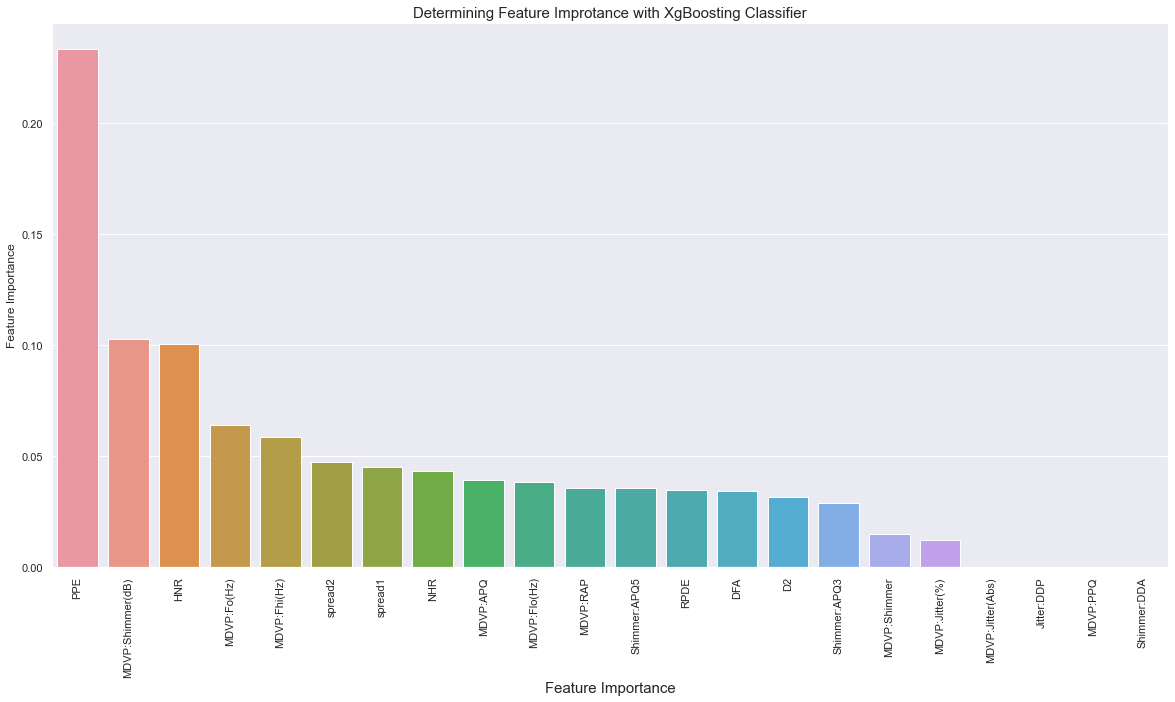

In [96]:
#variable importance
plt.figure(figsize = (20,10))
ax=sns.barplot(x=FI_xg['Variable'], y = FI_xg['Feature Importance'])
plt.xlabel('Feature Importance', fontsize = 15)
plt.title('Determining Feature Improtance with XgBoosting Classifier', fontsize = 15);
ax=plt.setp(ax.get_xticklabels(), rotation=90)

## LightGBM

In [97]:
#replace all non-alphanumeric characters in the column names:
dp.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in dp.columns]
#splitting the data in train and test 70:30
X = dp.drop('status',axis=1)    
Y = dp['status']  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)



In [98]:
lgb= lgb.LGBMClassifier(n_estimators=200,learning_rate=0.05,random_state=25)
lgb = lgb.fit(x_train, y_train)
y_predictlg = lgb.predict(x_test)

In [99]:
modellg_score = lgb.score(x_train, y_train)
print('Accuracy Score of Training Data: ', modellg_score)

Accuracy Score of Training Data:  1.0


In [100]:
modellg_score = accuracy_score(y_test, y_predictlg)
print('Accuracy Score of Test Data:', modellg_score)

Accuracy Score of Test Data: 0.9491525423728814


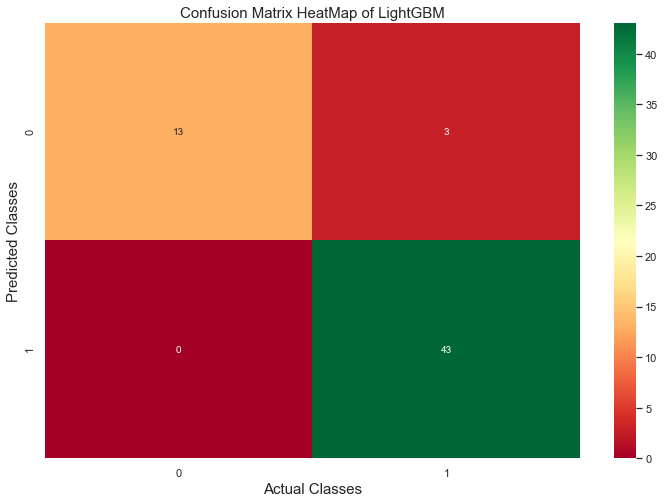

In [101]:
#visualization of confusion matrix in the form of a heatmap
cm = confusion_matrix(y_test, y_predictlg)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of LightGBM', fontsize = 15);

In [102]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_predictlg, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        43
           0       1.00      0.81      0.90        16

    accuracy                           0.95        59
   macro avg       0.97      0.91      0.93        59
weighted avg       0.95      0.95      0.95        59



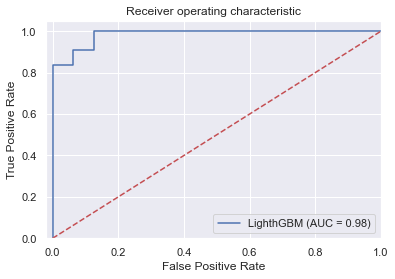

In [103]:
#plotting ROC and AUC
probs = lgb.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_lg = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='LighthGBM (AUC = %0.2f)' % roc_auc_lg)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('xg_ROC')
plt.show()

In [104]:
precision_lg, recall_lg, f1_score_lg, support = precision_recall_fscore_support(y_test,  y_predictlg,average='macro')
print('Precision Score :', '%0.2f' % precision_lg)
print('Recall Score :', '%0.2f' % recall_lg)
print('F1-Score:', '%0.2f' % f1_score_lg)
lg_Acc= accuracy_score(y_test,  y_predictlg)
print('Accuracy Score :','%0.2f' % lg_Acc)
print('AUC :','%0.2f' % roc_auc_lg)

Precision Score : 0.97
Recall Score : 0.91
F1-Score: 0.93
Accuracy Score : 0.95
AUC : 0.98


In [105]:
## Calculating feature importance
FI_LG= pd.DataFrame(lgb.feature_importances_, columns = ['Feature Importance'], index = x_train.columns)
FI_lg = pd.DataFrame(FI_LG.sort_values(by = 'Feature Importance', ascending = False))
FI_lg.reset_index(inplace=True)
FI_lg = FI_xg.rename(columns={'index': 'Variable'}, index=None)
FI_lg

,Variable,Feature Importance
0,PPE,0.233153
1,MDVP:Shimmer(dB),0.102741
2,HNR,0.100246
3,MDVP:Fo(Hz),0.063962
4,MDVP:Fhi(Hz),0.058698
5,spread2,0.047255
6,spread1,0.045275
7,NHR,0.043232
8,MDVP:APQ,0.039008
9,MDVP:Flo(Hz),0.038525


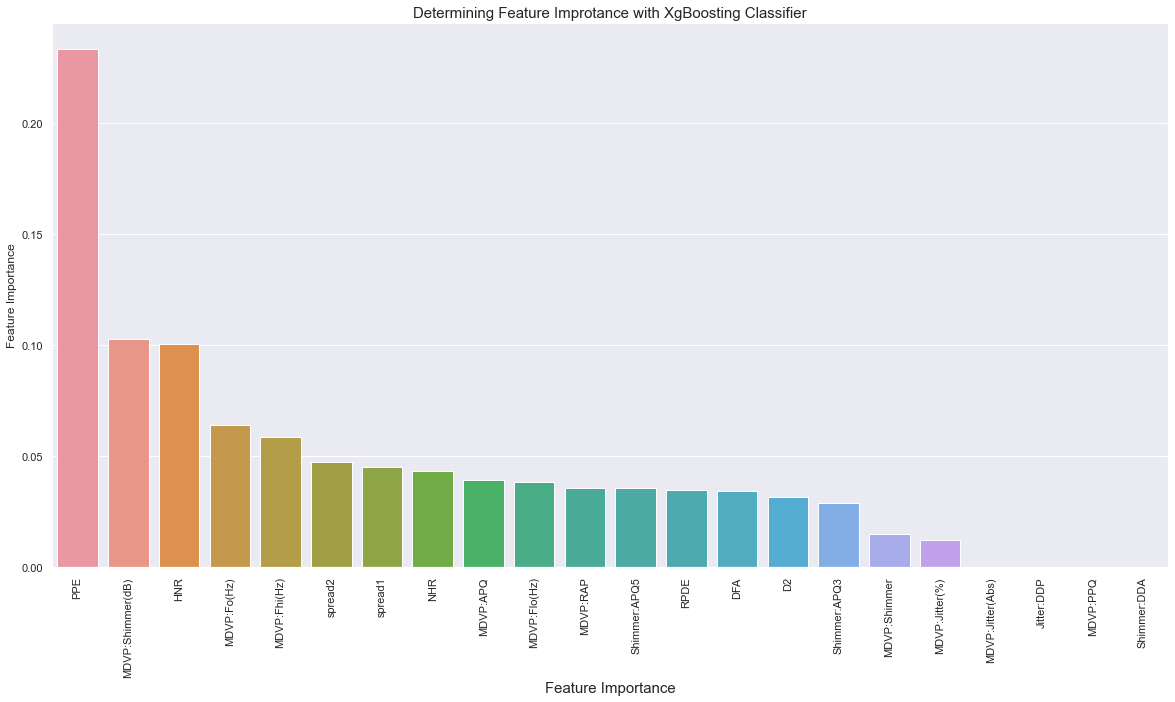

In [106]:
#variable importance
plt.figure(figsize = (20,10))
ax=sns.barplot(x=FI_lg['Variable'], y = FI_lg['Feature Importance'])
plt.xlabel('Feature Importance', fontsize = 15)
plt.title('Determining Feature Improtance with XgBoosting Classifier', fontsize = 15);
ax=plt.setp(ax.get_xticklabels(), rotation=90)

## Result Data Frame

In [107]:
modellists = []
modellists.append(['Logistic Regression',log_acc  * 100, recall_log * 100, precision_log * 100,roc_auc_log*100,f1_score_log*100])
modellists.append(['K-Nearest Neighbour', knn_acc * 100, recall_knn * 100, precision_knn * 100,roc_auc_knn*100,f1_score_knn*100])
modellists.append(['Randon forest', rf_Acc * 100, recall_rf * 100, precision_rf * 100,roc_auc_rf*100,f1_score_rf*100])
modellists.append(['Support Vector Classifier', SV_Acc * 100, recall_SV * 100, precision_SV * 100,roc_auc_svc*100,f1_score_SV*100])
modellists.append(['Bagging', bg_Acc * 100, recall_bg * 100, precision_bg * 100,roc_auc_bg*100,f1_score_bg*100])
modellists.append(['Adaptive Boosting', ad_Acc * 100, recall_ad * 100, precision_ad * 100,roc_auc_ad*100,f1_score_ad*100])
modellists.append(['Gradient Boosting', gb_Acc * 100, recall_gb * 100, precision_gb * 100,roc_auc_gb*100,f1_score_gb*100])
modellists.append(['XGradient Boosting', xg_Acc * 100, recall_xg * 100, precision_xg * 100,roc_auc_xg*100,f1_score_xg*100])
modellists.append(['LightGBM Boosting', lg_Acc * 100, recall_lg * 100, precision_lg * 100,roc_auc_lg*100,f1_score_lg*100])
model_df = pd.DataFrame(modellists, columns = ['Model', 'Accuracy Scores on Test', 'Recall Score', 'Precision Score','AUC','F1 Score'])
model_df

,Model,Accuracy Scores on Test,Recall Score,Precision Score,AUC,F1 Score
0,Logistic Regression,89.830508,85.174419,88.412698,91.715116,86.590909
1,K-Nearest Neighbour,96.610169,97.674419,94.444444,98.401163,95.868347
2,Randon forest,88.135593,81.162465,89.450355,95.308123,83.998450
3,Support Vector Classifier,93.220339,87.500000,95.744681,96.220930,90.634921
4,Bagging,93.220339,89.462209,93.095238,98.837209,91.060606
5,Adaptive Boosting,94.915254,90.625000,96.739130,99.418605,93.142193
6,Gradient Boosting,94.915254,90.625000,96.739130,98.982558,93.142193
7,XGradient Boosting,94.915254,90.625000,96.739130,98.982558,93.142193
8,LightGBM Boosting,94.915254,90.625000,96.739130,98.401163,93.142193


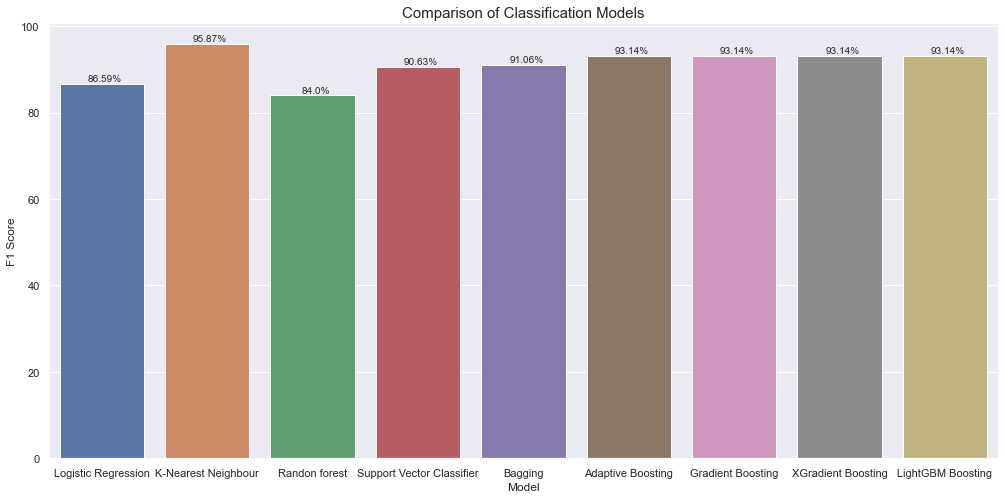

In [108]:
fig, ax = plt.subplots(figsize=(20,8))
width = len(model_df['Model'].unique()) + 8
fig.set_size_inches(width , 8)
ax=sns.barplot(data = model_df, x= 'Model',y='F1 Score') 
plt.title('Comparison of Classification Models', fontsize = 15);



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height(),decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(3, 5), textcoords='offset points')

Based on the F1 score, Accuracy and Sensitivity, KNN is the better performing model coampred with the remaining models.

## Insights
1)  PPE, D2, MDVP:Fhi(Hz), MDVP:Fo(Hz), MDVP:Shimmer(dB), MDVP:APQ, spread1, spread2, DFA, RPDE, HNR are variables that
    contribute more than 5% towards the accuracy in certain models <br/>
2) When comparing the interqaurtile ranges for all the numreic attributes against the status of the patient, it can be inferred    that measures of vocal frequncy have a higher iqr for healty patients, and Average HNR is higher for healthy patients. <br/>
3) CART Rules: <br/>
 &emsp; Rule 1:if PPE <= 0.135 and HNR <= 26.587 and MDVP:APQ <= 0.015 then the patient is likely to have parkinson's <br/>
 &emsp; Rule 2: if PPE <= 0.135 and HNR > 26.587 and MDVP:Fhi(Hz) <= 180.73 then the patient is likely to be healthy <br/>
 &emsp; Rule 3: if PPE > 0.135 and MDVP:APQ > 0.02 then the patient is likely to be healthy <br/>
 &emsp; Rule 4: if PPE > 0.135 and MDVP:APQ <= 0.02 and MDVP:Fo(Hz) <= 117.25 is likely to have parkinson's <br/>